

## 📚 **Table of Contents**

1. 📝 **Introduction**

   * Problem Statement
   * Project Goals
   * Dataset Overview

2. 📥 **Import Libraries & Load Dataset**

   * Import Required Libraries
   * Load Dataset
   * Preview & Basic Information

3. 🧼 **Data Preprocessing**

   * Handle Missing Values
   * Data Cleaning
   * Categorical Encoding (Label Encoding)
   * Outlier Detection & Handling
   * Feature Scaling (Min-Max Scaling)

4. 📊 **Exploratory Data Analysis (EDA)**

   * Univariate Analysis
   * Bivariate Analysis
   * Target Variable Distribution
   * Correlation Heatmap
   * Insights & Observations

5. 🧠 **Model Preparation**

   * Feature Selection
   * Train-Test Split
   * Define Features & Target Variable

6. 🤖 **Model Building (10 Classification Models)**

   * Logistic Regression
   * Decision Tree
   * Random Forest
   * Gradient Boosting
   * AdaBoost
   * Naive Bayes
   * Support Vector Machine (SVM)
   * K-Nearest Neighbors (KNN)
   * XGBoost
   * LightGBM

7. 📈 **Model Evaluation**

   * Accuracy Score
   * Classification Report
   * Confusion Matrix
   * Model Comparison Table

8. 🏆 **Best Model Selection & Saving**

   * Select Best Model Based on Accuracy/F1
   * Save Model using `joblib`
   * Load and Test Saved Model

9. 🌟 **Feature Importance Analysis**

   * Feature Importance Plot (Tree-Based Models)
   * Key Insights from Features



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Save best model
import joblib

In [2]:
df = pd.read_csv("/kaggle/input/loan-approval-dataset/loan_approval.csv")
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [3]:
# 2. Basic EDA
print(df.describe())
print(df.isnull().sum())
print(df['loan_approved'].value_counts())

              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
25%     61296.250000    433.000000  12748.750000       10.000000    45.000000
50%     90387.500000    576.000000  25661.500000       21.000000    55.000000
75%    120099.750000    715.000000  37380.500000       31.000000    70.000000
max    149964.000000    850.000000  49999.000000       40.000000   100.000000
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64
loan_approved
False    1121
True      879
Name: count, dtype: int64


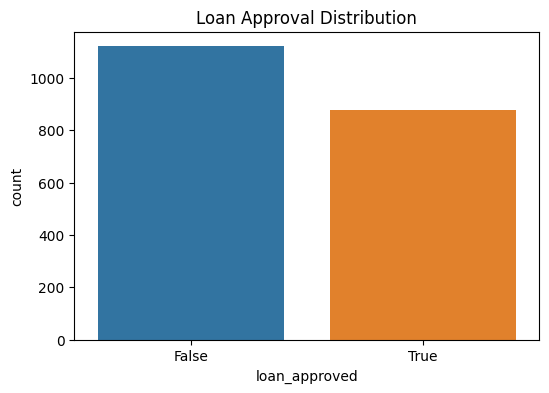

In [4]:
# 3. Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='loan_approved', data=df)
plt.title('Loan Approval Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


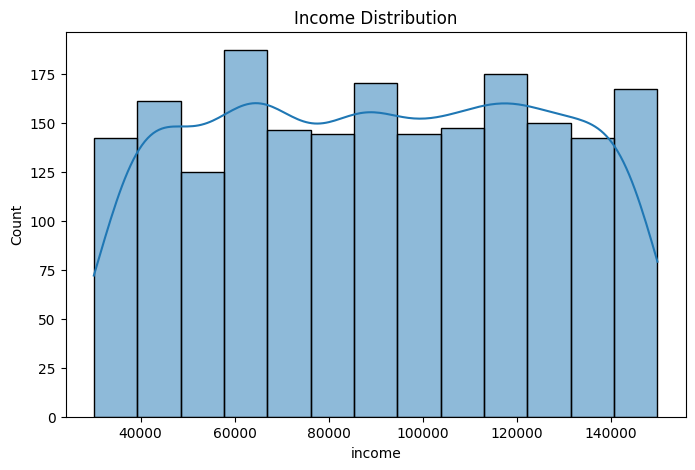

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

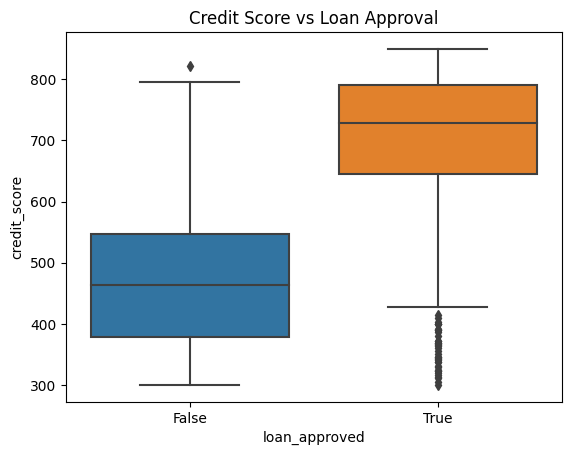

In [6]:
sns.boxplot(x='loan_approved', y='credit_score', data=df)
plt.title('Credit Score vs Loan Approval')
plt.show()

In [7]:

# Select numeric columns
num_cols = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in num_cols:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"📌 {col} → Outliers found: {len(outliers)} (Lower: {lb:.2f}, Upper: {ub:.2f})")

📌 income → Outliers found: 0 (Lower: -26909.00, Upper: 208305.00)
📌 credit_score → Outliers found: 0 (Lower: 10.00, Upper: 1138.00)
📌 loan_amount → Outliers found: 0 (Lower: -24198.88, Upper: 74328.12)
📌 years_employed → Outliers found: 0 (Lower: -21.50, Upper: 62.50)
📌 points → Outliers found: 0 (Lower: 7.50, Upper: 107.50)


In [8]:


# Detect categorical columns automatically
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("📌 Categorical Columns:", list(cat_cols))


📌 Categorical Columns: ['name', 'city', 'loan_approved']


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode all categorical columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(f"✅ Encoded column: {col}")


✅ Encoded column: name
✅ Encoded column: city
✅ Encoded column: loan_approved


In [10]:

if 'name' in df.columns:
    df.drop('name', axis=1, inplace=True)

In [11]:
# 3. Feature Scaling (MinMax)
# ==============================
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('loan_approved')
df[num_cols] = scaler.fit_transform(df[num_cols])


In [12]:
# 4. Train-Test Split
# ==============================
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training set:", X_train.shape)
print("✅ Test set:", X_test.shape)

✅ Training set: (1600, 6)
✅ Test set: (400, 6)


In [13]:
# 5. Define Models
# ==============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [14]:
# 6. Train & Evaluate Models
# ==============================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    
    print(f"\n📌 Model: {name}")
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


📌 Model: Logistic Regression
Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       224
           1       0.99      0.95      0.97       176

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400


Confusion Matrix:
 [[223   1]
 [  9 167]]
--------------------------------------------------

📌 Model: Decision Tree
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       176

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
 [[224   0]
 [  0 176]]
--------------------------------------------------

📌 Model: Random Forest


In [15]:
# 7. Best Model Selection
# ==============================
best_model_name, best_accuracy = max(results, key=lambda x: x[1])
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


🏆 Best Model: Decision Tree with Accuracy: 1.0000


In [16]:
# 8. Save Best Model
# ==============================
joblib.dump(best_model, 'best_loan_model.pkl')
print("✅ Best model saved as best_loan_model.pkl")


✅ Best model saved as best_loan_model.pkl


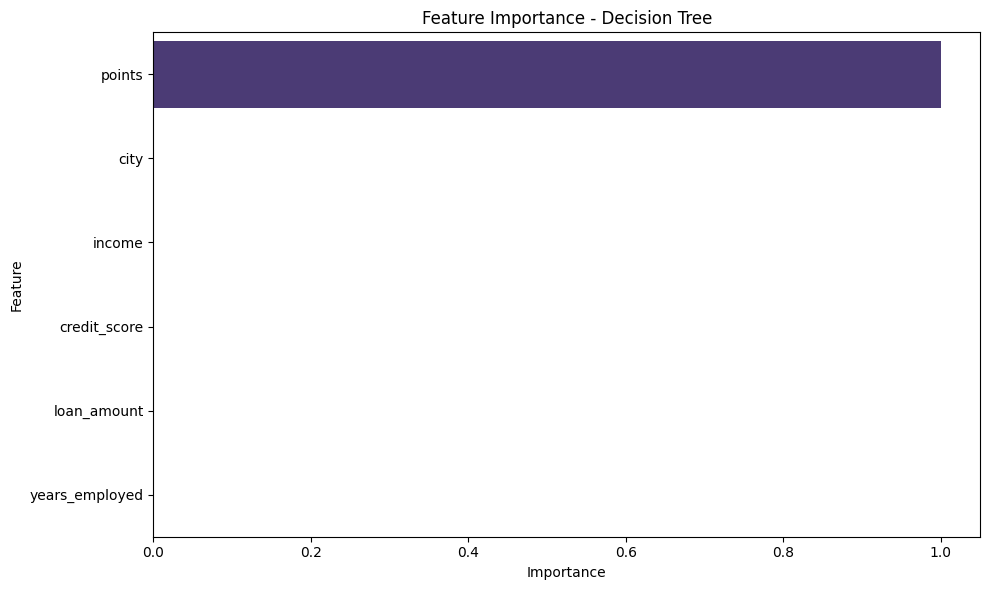

In [17]:
# 9. Feature Importance (Tree Based Models)
# ==============================
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_names = X.columns
    fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    fi_df = fi_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Best model does not support feature importance.")

In [18]:
loaded_model = joblib.load('best_loan_model.pkl')
y_loaded_pred = loaded_model.predict(X_test)
print("\n✅ Loaded Model Accuracy:", accuracy_score(y_test, y_loaded_pred))


✅ Loaded Model Accuracy: 1.0
